In [ ]:
pip install fast_ml --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 KB 3.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import spacy
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS
import nltk
nltk.download('punkt')
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
wn=nltk.WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
stopwords = set(stopwords.words('english'))
wn = WordNetLemmatizer()
nlp = spacy.load("en_core_web_sm")
import scipy.sparse as sp
from sklearn.model_selection import train_test_split
from fast_ml.model_development import train_valid_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from collections import Counter

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/fake_papers_train_part_public_extended.csv')
print(df.shape)
df.head(10)

(5350, 4)


,id,text,source,fake
0,1,Modern two-dimensional imaging is of such qual...,sdg_abstracts_original,0
1,2,Background: The optimal sequence of systemic p...,generated_sdg,1
2,5,This chapter opens with a discussion of the ef...,summarized_sdg,1
3,10,The time scale of the ultra-short-term can str...,micpro_retracted,1
4,23,Electronic nose or machine olfaction are syste...,generated_micpro,1
5,28,"In this paper, the aim of the study is to dete...",summarized_sdg,1
6,29,Basell has acquired German steam cracker Ruhr ...,sdg_abstracts_original,0
7,30,"In this paper, Shimerdas and his co-workers ex...",summarized_sdg,1
8,37,Metastatic malignant melanoma is an incurable ...,sdg_abstracts_original,0
9,38,"In this paper, the authors describe a new faul...",summarized_micpro,1


In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
text = list(df["text"])

A. TF-IDF Feature extraction
For fake and human-generated articles, extract the TF-IDF as follows:
1. TF-IDF features of tokens in text
2. TF-IDF features of POS tags
3. TF-IDF features of dependency labels
Note that data preprocessing should be done before feature extraction (for example,
lowercasing, conversion to lemma, etc.).

In [ ]:
def clean_text(text):
    text = text.lower()
    text = ''.join(c for c in text if c.isalpha() or c.isspace())
    tokens = re.split('\W+', text)
    text = [wn.lemmatize(word) for word in tokens if word not in stopwords]
    return ' '.join(text)

df['cleanedtext'] = df['text'].apply(lambda x: clean_text(x.lower()))
df.head(10)

,id,text,source,fake,cleanedtext
0,1,Modern two-dimensional imaging is of such qual...,sdg_abstracts_original,0,modern twodimensional imaging quality echocard...
1,2,Background: The optimal sequence of systemic p...,generated_sdg,1,background optimal sequence systemic palliativ...
2,5,This chapter opens with a discussion of the ef...,summarized_sdg,1,chapter open discussion effect long wave seapo...
3,10,The time scale of the ultra-short-term can str...,micpro_retracted,1,time scale ultrashortterm strengthen diverse v...
4,23,Electronic nose or machine olfaction are syste...,generated_micpro,1,electronic nose machine olfaction system used ...
5,28,"In this paper, the aim of the study is to dete...",summarized_sdg,1,paper aim study determine effect transplanting...
6,29,Basell has acquired German steam cracker Ruhr ...,sdg_abstracts_original,0,basell acquired german steam cracker ruhr oel ...
7,30,"In this paper, Shimerdas and his co-workers ex...",summarized_sdg,1,paper shimerdas coworkers examine effect diffe...
8,37,Metastatic malignant melanoma is an incurable ...,sdg_abstracts_original,0,metastatic malignant melanoma incurable diseas...
9,38,"In this paper, the authors describe a new faul...",summarized_micpro,1,paper author describe new fault injection tech...


In [ ]:
#As entire text not for every id
def cleaned_text(text):
    doc = nlp(text)
    cleaned_corpus = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
    return ''.join(text)

In [ ]:
cleaned_corpus = [cleaned_text(text) for text in text]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

text = cleaned_corpus

# Define a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the text and transform the text into a TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(text)

# Geting the feature names
feature_names = vectorizer.get_feature_names_out()

# Geting TF-IDF values for each token in the text
tfidf_values_token = tfidf_matrix.toarray()[0]

# Create a dictionary mapping each token to its TF-IDF value
tfidf_dict = {feature_names[i]: tfidf_values_token[i] for i in range(len(feature_names))}

# Print the TF-IDF values for each token in descending order
for token, tfidf in sorted(tfidf_dict.items(), key=lambda x: x[1], reverse=True):
    print(f"{token}: {tfidf}")

Streaming output truncated to the last 5000 lines.
sintering: 0.0
sinus: 0.0
sinusoidal: 0.0
sinusoids: 0.0
sio2: 0.0
siox: 0.0
sip: 0.0
sipam: 0.0
siph: 0.0
siphon: 0.0
siphoned: 0.0
siphoning: 0.0
siphons: 0.0
sipuleucel: 0.0
sir: 0.0
sira: 0.0
sirna: 0.0
sirolimus: 0.0
sirs: 0.0
sirt1: 0.0
sisal: 0.0
sisi: 0.0
siso: 0.0
sister: 0.0
sit: 0.0
site: 0.0
sited: 0.0
sites: 0.0
sits: 0.0
sitta: 0.0
sitting: 0.0
situ: 0.0
situate: 0.0
situated: 0.0
situating: 0.0
situation: 0.0
situational: 0.0
situations: 0.0
six: 0.0
six809: 0.0
sixteen: 0.0
sixth: 0.0
sixty: 0.0
sizable: 0.0
size: 0.0
sized: 0.0
sizes: 0.0
sizing: 0.0
sk: 0.0
ska1: 0.0
skating: 0.0
skeletal: 0.0
skeleton: 0.0
skeletonize: 0.0
skeletons: 0.0
skeptical: 0.0
skepticism: 0.0
skeptics: 0.0
sketching: 0.0
skew: 0.0
skewadjoint: 0.0
skewness: 0.0
skier: 0.0
skill: 0.0
skilled: 0.0
skillful: 0.0
skillfully: 0.0
skills: 0.0
skin: 0.0
skinto: 0.0
skip: 0.0
skipped: 0.0
skipping: 0.0
skiǐ: 0.0
skn: 0.0
skopje: 0.0
skov3: 0.0
skp1:

In [ ]:
# Define a function to extract POS tags from a text
def extract_pos_tags(text):
    doc = nlp(text)
    pos_tags = [token.pos_ for token in doc]
    return ' '.join(pos_tags)

In [ ]:
pos_tags = [extract_pos_tags(text) for text in text ]

In [ ]:
# Define a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the POS tags and transform them into a TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(pos_tags)

# Get the feature names (i.e., POS tags) in the TF-IDF matrix
feature_names = vectorizer.get_feature_names_out()

# Get the TF-IDF values for each POS tag in the text
tfidf_values = tfidf_matrix.toarray()[0]

# Create a dictionary mapping each POS tag to its TF-IDF value
tfidf_dict = {feature_names[i]: tfidf_values[i] for i in range(len(feature_names))}

# Print the TF-IDF values for each POS tag in descending order
for pos_tag, tfidf in sorted(tfidf_dict.items(), key=lambda x: x[1], reverse=True):
    print(f"{pos_tag}: {tfidf}")

noun: 0.6774575330096019
adj: 0.396408690332045
adp: 0.3354376974024687
punct: 0.26830001307310963
num: 0.2395356195069923
det: 0.22155443564920768
verb: 0.19455386449343184
aux: 0.16506261140560258
cconj: 0.13123766070854648
adv: 0.06781433287320464
pron: 0.05789412530262863
part: 0.045861449329234576
sconj: 0.01735556166679725
propn: 0.01640784480299565
intj: 0.0
space: 0.0
sym: 0.0


In [ ]:
text = cleaned_corpus

# Define a function to extract dependency parses from a text
def extract_dep_parses(text):
    doc = nlp(text)
    dep_parses = [' '.join([token.dep_, token.head.dep_]) for token in doc]
    return ' '.join(dep_parses)
dep_parses = [extract_dep_parses(text) for text in text]

In [ ]:
# Define a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the dependency parses and transform them into a TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(dep_parses)

# Get the feature names (i.e., dependency parses) in the TF-IDF matrix
feature_names = vectorizer.get_feature_names_out()

# Get the TF-IDF values for each dependency parse in the text
tfidf_values_dep = tfidf_matrix.toarray()[0]

# Create a dictionary mapping each dependency parse to its TF-IDF value
tfidf_dict = {feature_names[i]: tfidf_values_dep[i] for i in range(len(feature_names))}

# Print the TF-IDF values for each dependency parse in descending order
for dep_parse, tfidf in sorted(tfidf_dict.items(), key=lambda x: x[1], reverse=True):
    print(f"{dep_parse}: {tfidf}")

pobj: 0.5591557342759524
root: 0.4286659532703105
prep: 0.39932232034040227
amod: 0.2567905911190939
conj: 0.21939922783856625
appos: 0.17879491904325961
nsubj: 0.17859997527409732
punct: 0.16810429540012176
nummod: 0.167623473788637
ccomp: 0.14460722168845144
det: 0.13878975359492507
acomp: 0.10038247794612211
npadvmod: 0.09880560362375562
dobj: 0.0854459216748466
nsubjpass: 0.07802258238214868
cc: 0.07778322442780289
acl: 0.07344925661750303
csubj: 0.06344084213915818
quantmod: 0.05583820317433822
advmod: 0.05465600327209216
aux: 0.05409547999672456
relcl: 0.046070760863566006
compound: 0.04300337605846286
xcomp: 0.04212625367407771
attr: 0.040566595582422656
agent: 0.037073832016018125
auxpass: 0.03545019314745925
advcl: 0.03507015597793936
preconj: 0.014362504235431946
mark: 0.012457785740129419
pcomp: 0.012379290921157264
neg: 0.010708290365216448
poss: 0.006853050931561481
case: 0.0
csubjpass: 0.0
dative: 0.0
dep: 0.0
expl: 0.0
intj: 0.0
meta: 0.0
nmod: 0.0
oprd: 0.0
parataxis: 0

In [ ]:
vectorizer = TfidfVectorizer()
x_tfidf_token_data = vectorizer.fit_transform(cleaned_corpus)
x_tfidf_tag_data = vectorizer.fit_transform(pos_tags)
x_tfidf_dep_data = vectorizer.fit_transform(dep_parses)
x_one_hot_data = x_tfidf_token_data.ceil()

In [ ]:
x_whole_data = sp.hstack((x_tfidf_token_data, x_tfidf_tag_data, x_tfidf_dep_data))

B. SVM Classifier for detection

1. Train a SVM classifier that uses 1-hot vectors as features. Report the
accuracy and the confusion matrix.
2. Train three SVM classifiers using the features extracted in the above
subparts (i.e. A.1, A.2, and A.3). Report the accuracy, and the confusion
matrix for each of the classifiers.
3. Train a SVM classifier that uses all the features computed in part A, and
report accuracy and the confusion matrix.
Report your observations about which model performs the best and why.
Note: Use scikit-learn to create TF-IDF features and SVM training. Use 60-20-20 split
for train, val, and test. Report confusion matrix on the test set.

In [ ]:
# Create confusion metrix
def plot_confusion_matrix(y_test, y_pred, classes = None, figsize = (10, 10), text_size = 10):

    import matplotlib.pyplot as plt
    import itertools
    from sklearn.metrics import confusion_matrix

    # create the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_norm = cm.astype("float")/ cm.sum(axis = 1)[:, np.newaxis]
    n_classes = cm.shape[0]

    # let's pretify it
    fig, ax = plt.subplots(figsize = figsize)

    # create a matrix plot
    cax = ax.matshow(cm, cmap = plt.cm.Blues)
    fig.colorbar(cax)

    # Set labels to be classes
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # label the axes

    ax.set(title = "Confusion Matrix",
        xlabel = "prediction label",
        ylabel = "True label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

    # set x_axis labels tpo bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # set threshold for different color
    threshold = (cm.max() + cm.min())/2

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                horizontalalignment = "center",
                color = "white" if cm[i, j] > threshold else "black",
                size = text_size)





def train_model(X_data, y_data):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
    X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size = 0.25,random_state = 42)
    svm = SVC(gamma='scale',
              C=1,
              kernel='linear',
              degree=5,
              random_state = 42
              )
    svm.fit(X_train, y_train)
    accuracy = svm.score(X_test, y_test)
    y_predict = svm.predict(X_test)
    print("accuracy :", accuracy*100, "%")
    plot_confusion_matrix(y_test, y_predict)

SVM Classifier for tokens
accuracy : 83.64485981308411 %


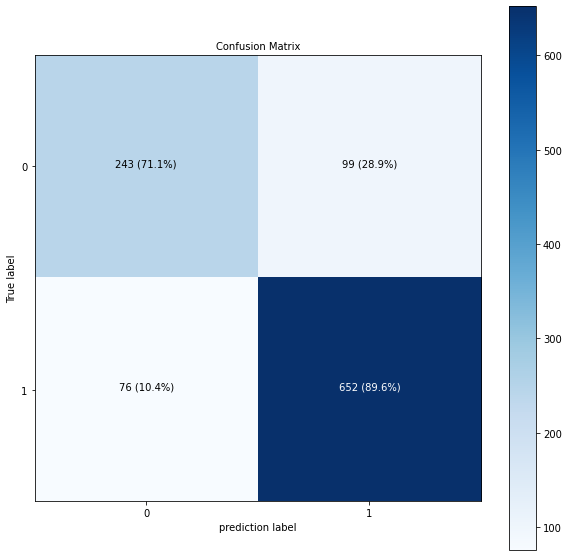

In [ ]:
print("SVM Classifier for tokens")
X_data = x_tfidf_token_data
y_data = np.array(df['fake'])
train_model(X_data,y_data)

SVM Classifier for pos_tags
accuracy : 74.11214953271028 %


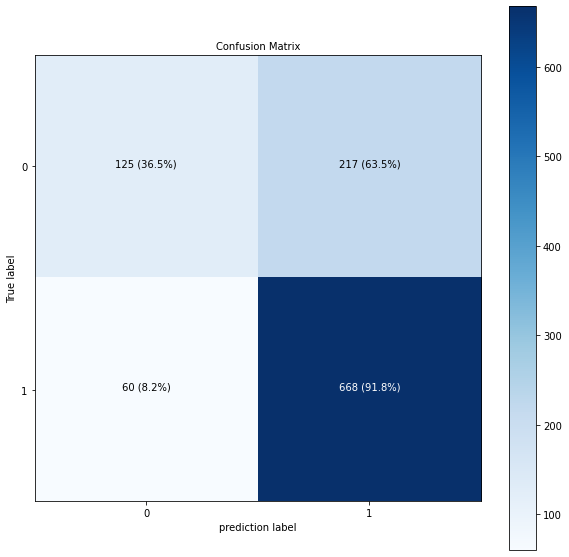

In [ ]:
print("SVM Classifier for pos_tags")
X_data = x_tfidf_tag_data
y_data = np.array(df['fake'])
train_model(X_data,y_data)

SVM Classifier for dependency parser
accuracy : 77.19626168224299 %


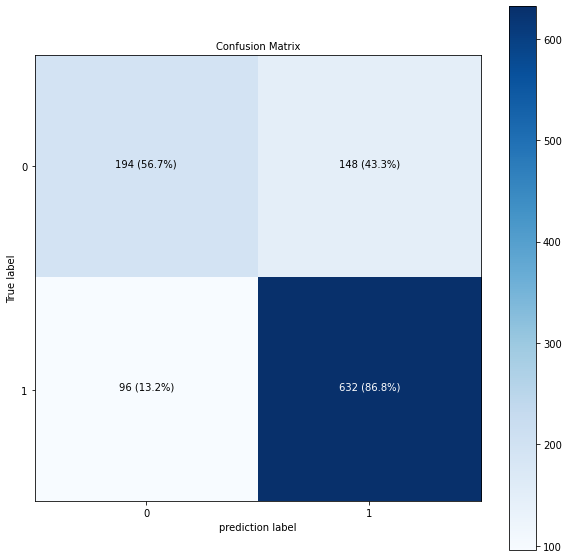

In [ ]:
print("SVM Classifier for dependency parser")
X_data = x_tfidf_dep_data
y_data = np.array(df['fake'])
train_model(X_data,y_data)

SVM Classifier for one hot data
accuracy : 85.04672897196261 %


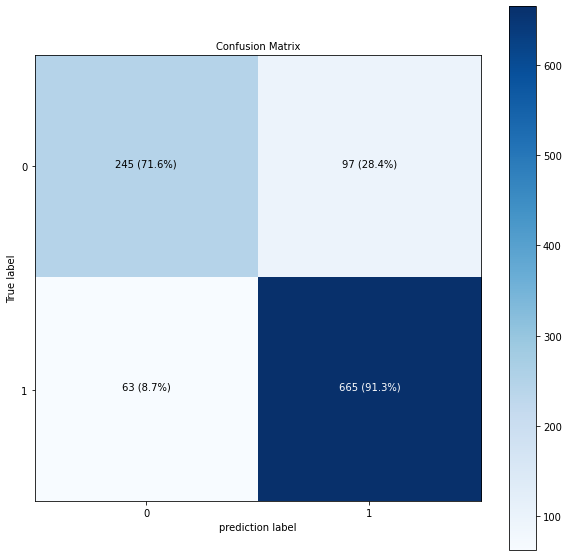

In [ ]:
print("SVM Classifier for one hot data")
X_data = x_one_hot_data
y_data = np.array(df['fake'])
train_model(X_data,y_data)

SVM Classifier for whole data
accuracy : 87.38317757009347 %


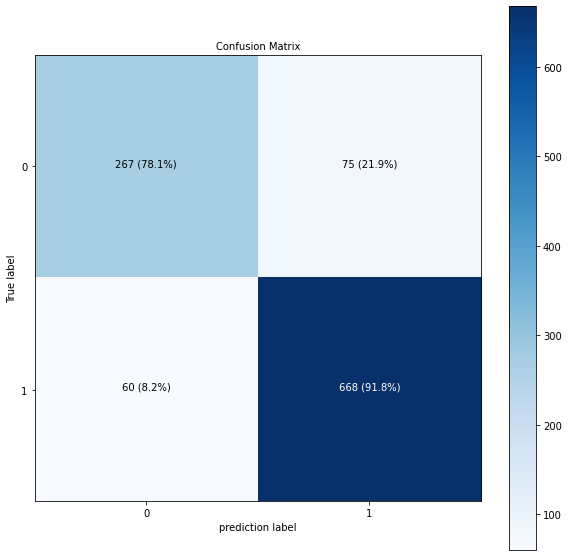

In [ ]:
print("SVM Classifier for whole data")
X_data = x_whole_data
y_data = np.array(df['fake'])
train_model(X_data,y_data)